In [1]:
# ipython directives
%matplotlib inline

In [2]:
# high-level imports
import numpy as np
from scipy.io.wavfile import read as wavread, write as wavwrite
from matplotlib import pyplot as plt
import pyaudio
import wave
from scipy import signal
from scipy.interpolate import interp1d
from numpy.fft import fft, fftfreq

# local imports
from audio_helpers import play_audio, plot_time_domain, plot_spectrogram, plot_dft, observe_signal


In [3]:
# To begin, let's load in some original speech and define some constants.
FILE_NAME = "4.wav"
FILE_PATH = "data/wave/{}".format(FILE_NAME)
NFFT = 1024
[fs, speech] = wavread(FILE_PATH)

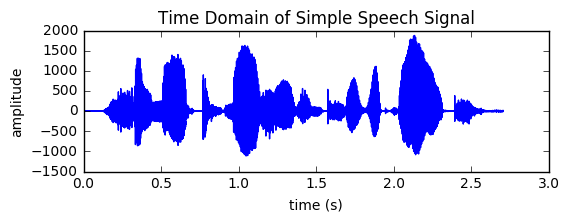

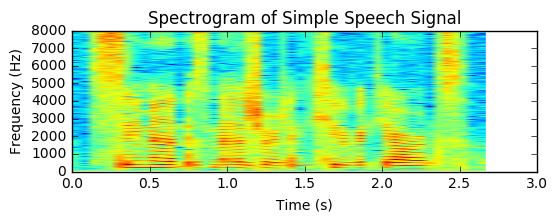

In [4]:
# Take a look at the unaltered speech in the time and frequency domains while it plays.
# Notice the higher frequencies present during fricatives.
observe_signal(speech, nfft=NFFT, title="Simple Speech Signal")
# play_audio(FILE_PATH)

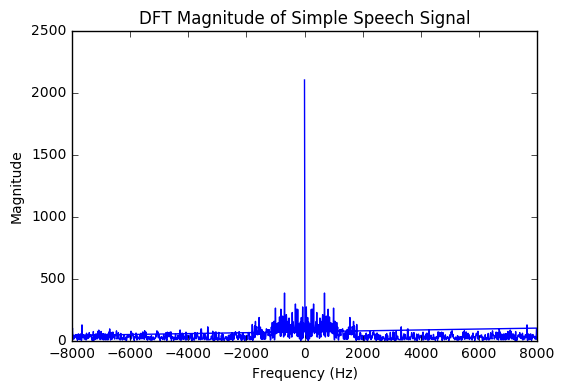

/home/aagnone3/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:3073: FutureWarning:  Note: Decimate's zero_phase keyword argument will default to True in a future release. Until then, decimate defaults to one-way filtering for backwards compatibility. Ideally, always set this argument explicitly.
  "explicitly.", FutureWarning)


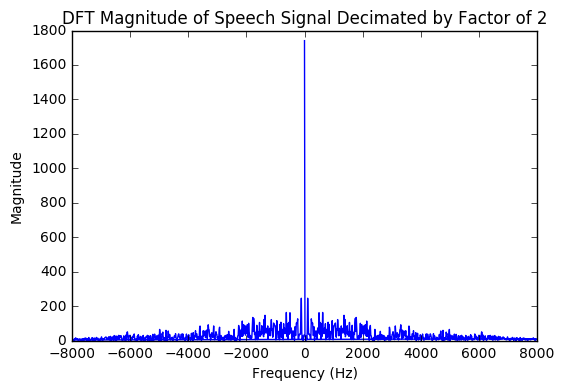

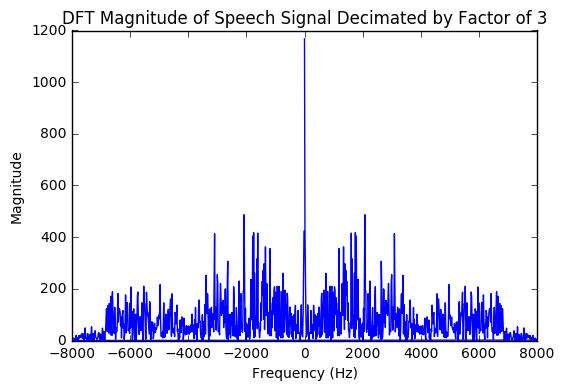

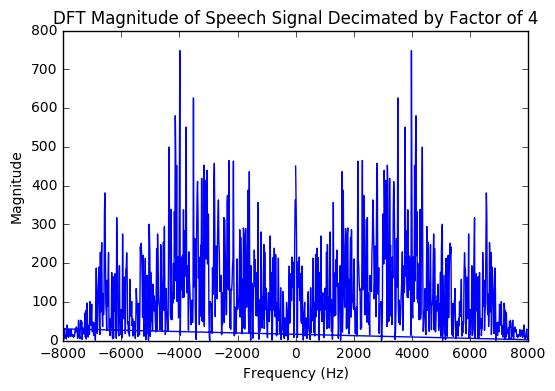

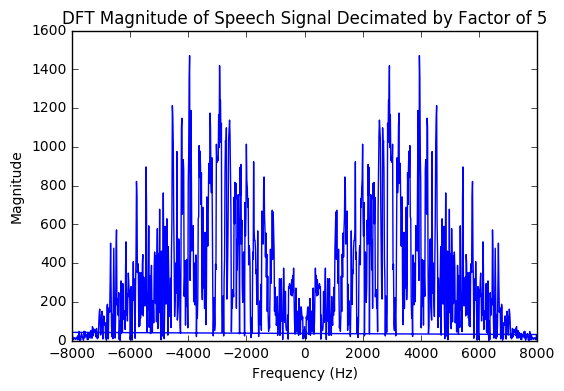

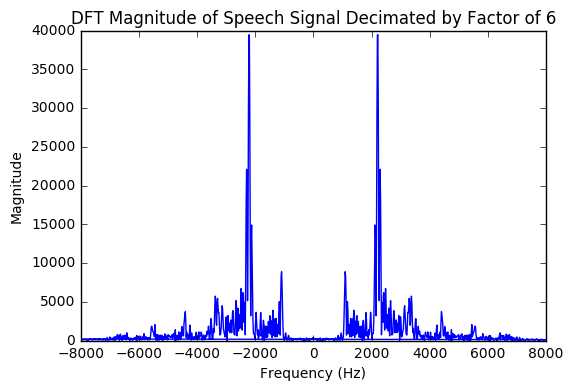

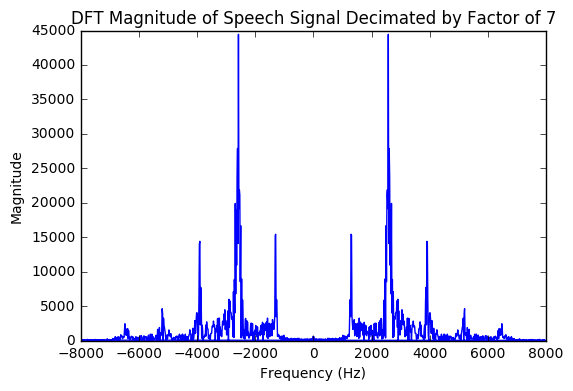

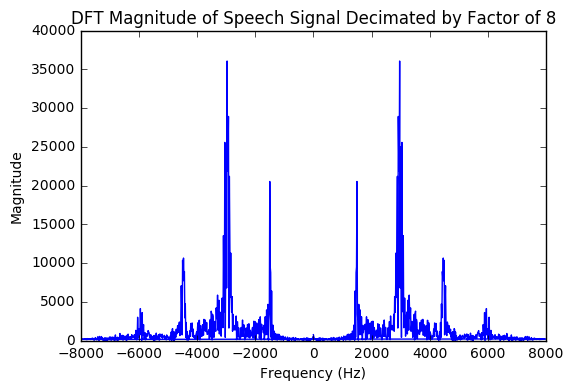

In [5]:
# Now take a look at how much aliasing affects the signal as we decimate by increasing factors.
# Note that taking the DFT of the full speech segment isn't really useful for anything but looking at
# the effect of aliasing on the signal's spectrum.

# Plot the original spectrum
plot_dft(speech, fs, NFFT, "Simple Speech Signal")

# Decimate by increasing factors, and show each spectrum.
# Note the change of y-axis scale as the decimation factor increases. Don't be fooled by the change of appearance.
for decimation_factor in [2, 3, 4, 5, 6, 7, 8]:
    decimated = signal.decimate(speech, decimation_factor).astype("int16")
    plot_dft(decimated, fs, NFFT, "Speech Signal Decimated by Factor of {}".format(decimation_factor))
    